# Download and filter Sentinel-1 images

**Why this module**: I oftentimes have to make a Dataset of Sentinel-1 images I can use for deep learning. This is quite difficult. I therefore made this module using, e.g., the SentinelAPI and ofter stuff. 

Simply put:
- Get Metadata from the region of interest.
- Filter the data, so you only get what you want
- Download, e.g., the thumbnails or the full data. 
- Can download thumbnaisl, raw, grd or slc. All is fine.



Requirements:
- User on Copernicus hub (for metadata)
- User on earthdata (for download)

# Imports

In [2]:

import sys, os, glob
sys.path.append(os.getenv('src_dir'))

from src.metadata import Sentinel_metadata
from src.download import Satellite_download

## Fetching data near Denmark

Querying products: 100%|██████████| 248/248 [00:03<00:00, 39.91product/s]


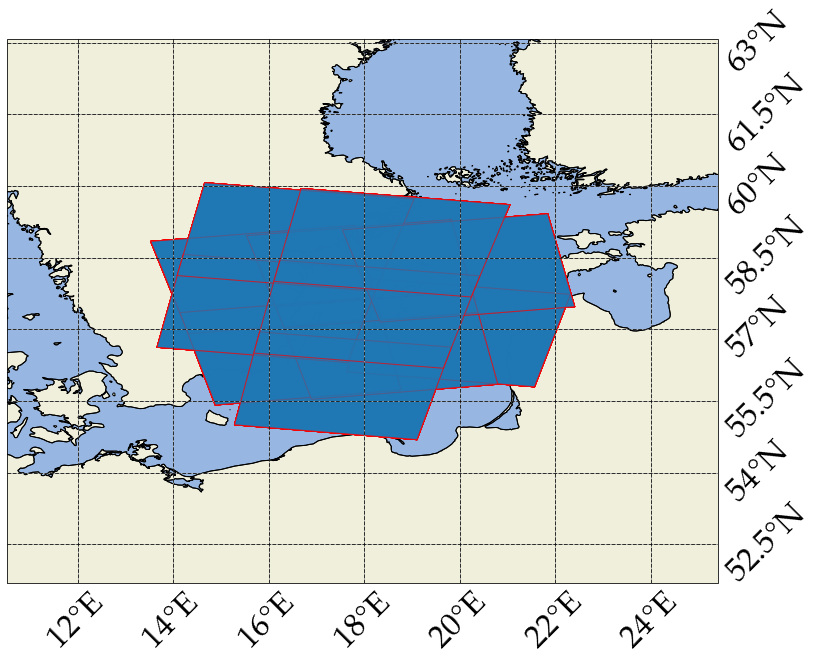

In [3]:
with Sentinel_metadata() as met:
    met.area([17.9,18,56.7,58])
    met.get_metadata(sensor='s1_raw',start_data='20220109',end_date='20221010')
    met.iw() #filer so we only have IW
    met.plot_image_areas() # Showing extent of images

# Download data

Alright, lets say that we want image 0 and 1, we simply do:

'../data/raw'

In [6]:
folder = f'{os.getenv("raw_data_dir")}/sweden_data/level0'
with Satellite_download(met.products_df.iloc[0:1]) as dwl:
    try:
        os.makedirs(folder, exist_ok=True)
        #save metadata
        met.products_df.to_pickle(f'{folder}/dataframe.pkl')
        #download the thumbnails
        dwl.download_thumbnails(folder=f'{folder}/thumbnails') 
        dwl.download_sentinel_1(data_folder=f'{folder}/raw')
    except Exception as e:
        print(e)

 > Command line argument '-f' makes no sense, ignoring.
 > Command line argument '/Users/kaaso/Library/Jupyter/runtime/kernel-a91cea45-1ea6-4f3e-8d01-e34e70349769.json' makes no sense, ignoring.
 > attempting to download https://urs.earthdata.nasa.gov/profile
 > Could not validate old cookie Jar
No existing URS cookie found, please enter Earthdata username & password:
(Credentials will not be stored, saved or logged anywhere)
 > attempting to download https://urs.earthdata.nasa.gov/profile
 > Username and Password combo was not successful. Please try again.
 > attempting to download https://urs.earthdata.nasa.gov/profile
 > attempting to download https://urs.earthdata.nasa.gov/profile
URL Error (from GET): <urlopen error [Errno 54] Connection reset by peer>, [Errno 54] Connection reset by peer, https://datapool.asf.alaska.edu/RAW/SA/S1A_IW_RAW__0SDV_20221008T045940_20221008T050012_045346_056BF3_4558.zip
There was a problem downloading https://datapool.asf.alaska.edu/RAW/SA/S1A_IW_RAW__